# Concaténation des fichiers Result et TimeSeries

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df_result= pd.read_csv('/home/fitec/Mise en situation professionnelle/Projets FITEC/Test Bench/Results/Results_201210.csv', sep =';')

In [3]:
df_result[:10]

,TEST_STAND,DATE,HEURE,SERIAL_NUMBER,PRODUCT_NUMBER,RESULT,ALIM_1,ALIM_2,DIRECTION
0,V01,28/09/2012,15:27:56,18806057d7990acb57b45b9e158dabb8,c4d2187fa110c66f771d6e3bfd20bd4a,G,1.764,0.528,L
1,V01,28/09/2012,15:41:12,fa3a3083f601fa224184a0294bc66fd2,c4d2187fa110c66f771d6e3bfd20bd4a,G,1.561,0.792,L
2,V01,28/09/2012,16:09:07,5375e20cc745c699d5b0451df7670f52,e0d25f75f0f54846e0d5929ed4b46aac,G,0.161,0.069,L
3,V01,28/09/2012,16:21:02,5830d17cc99259cd9afc27fbaf948f28,e0d25f75f0f54846e0d5929ed4b46aac,G,0.042,0.054,L
4,V01,28/09/2012,16:33:41,32943b5ea010c1c5a0d59af9b1c84ed0,e0d25f75f0f54846e0d5929ed4b46aac,G,0.203,0.069,L
5,V01,28/09/2012,16:41:26,896ec90e82ee90de9342d311dbf55cb3,e0d25f75f0f54846e0d5929ed4b46aac,G,0.042,0.054,L
6,V01,28/09/2012,17:01:51,6708c44794869fecc841594d0baa8046,e0d25f75f0f54846e0d5929ed4b46aac,W,1.561,0.651,L
7,V01,28/09/2012,17:06:47,6708c44794869fecc841594d0baa8046,e0d25f75f0f54846e0d5929ed4b46aac,W,1.729,0.756,L
8,V01,28/09/2012,17:18:35,f2be0b9cf7a9c9cedceccca75d9be83d,e0d25f75f0f54846e0d5929ed4b46aac,G,0.000,0.069,L
9,V01,28/09/2012,17:26:36,df192f9e71c839dbcde4262811ec25d8,b2da7b0ac8fae13ede591d37e1d2523c,G,0.042,0.087,L


/home/fitec/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RESULT', ylabel='count'>

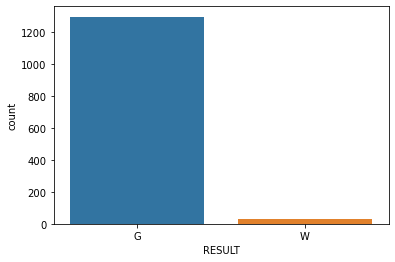

In [4]:
sns.countplot(df_result['RESULT'])

In [5]:
from glob import glob

# csvs will contain all CSV files names ends with .csv in a list
csvs = glob('/home/fitec/Mise en situation professionnelle/Projets FITEC/Test Bench/TimeSeries/*.csv')

# remove the trailing .csv from CSV files names
#new_table_list = [csv[78:-4] for csv in csvs]
csv_path_list = [csv for csv in csvs]
filename_list = [string.split('_')[-1] for string in csv_path_list]
new_table_list = [string.split('.')[0] for string in filename_list]

In [6]:
new_table_list

['6926d775e6fcbed5aeaa531efa12dfbe',
 'b4b3f8326e432d20bb621884f8e6aa20',
 '8816d1df936d5c40ca4179fa5f0ad99f',
 '52ecf1e7c8aaa541ba76dd4a1372a6a1',
 'f681b56ed35d6760937d87dcab59c0a2',
 'fb1df4bd01e18a909a7f7c312d44b1ef',
 'a37f1abeb6c47e469301d4f04a00787f',
 '6ce918f3c9a6c118c816218ffbf9ee45',
 'f4c52f8293ffbfb8bec79f4cf2b433f2',
 'cdb6e01847fde428721737cb6c990155',
 '956ddb56aa46360c594dedb53106ba55',
 'd7da13601de9fb361b96f6ddfeda8f9a',
 '0f317f23d9b5ab0414ed8dbb434ddd7c',
 'd1b40839789710616b1773d1bb9b4536',
 '77d964d1b28c5b44c4c3991b89c9cd6a',
 '612c0f1553bc0cd5c408cc039809402d',
 'bee292cdb164ae4674d46f6c1a93f92b',
 '46bad49ca3f5630e22171f5a8cc16183',
 '5c3e02cfd03a85468b9bd47bf5743576',
 'bb9cf128503d6705b0664e8990da028d',
 '2169073d44e23fc48e826bf2bca373d7',
 'e042800db139280254ab8751ed46ad2c',
 '1f2d5b6a8cf3031d7170dad3402d3ca7',
 'ccd1409f0eb495c7bd6adbce04784a9c',
 'f1c938bb68aaa21bb0bce6f69d2dc393',
 '7e08a58ae62ed8a0d9f246fd3dad9c21',
 '76df5ac95afc9def2d5bbbd583f21e80',
 

In [7]:
len(new_table_list)

1350

In [8]:
import pandas as pd
TimeSeries_csv = pd.read_csv(csv_path_list[0], sep=';')
#TimeSeries_csv

In [9]:
def get_values(dictionnary , serial_number, TimeSeries_file):
    dictionnary['SERIAL_NUMBER'].append(serial_number)
    dictionnary['SENSOR_1'].append(TimeSeries_file['SENSOR_1'].max())
    dictionnary['SENSOR_2'].append(TimeSeries_file['SENSOR_2'].max())
    dictionnary['SENSOR_3'].append(TimeSeries_file['SENSOR_3'].mean())
    dictionnary['SENSOR_4'].append(TimeSeries_file['SENSOR_4'].mean())
    dictionnary['SENSOR_5'].append(TimeSeries_file['SENSOR_5'].mean())
    dictionnary['PR_1'].append(TimeSeries_file['PR_1'].mean())
    dictionnary['PR_2'].append(TimeSeries_file['PR_2'].mean())
    dictionnary['PR_3'].append(TimeSeries_file['PR_3'].max())
    dictionnary['PR_4'].append(TimeSeries_file['PR_4'].max())
    dictionnary['TEMP_1'].append(TimeSeries_file['TEMP_1'].mean())
    dictionnary['TEMP_2'].append(TimeSeries_file['TEMP_2'].mean())
    dictionnary['BRAKE_1'].append(TimeSeries_file['BRAKE_1'].max())

d = {'SERIAL_NUMBER' : [],
     'SENSOR_1': [], 
     'SENSOR_2': [],
     'SENSOR_3': [], 
     'SENSOR_4': [],
     'SENSOR_5': [], 
     'PR_1': [],
     'PR_2': [],
     'PR_3': [],
     'PR_4': [],
     'TEMP_1': [],
     'TEMP_2': [],
     'BRAKE_1':[]}

for i in range(len(new_table_list)):
    serial_num = new_table_list[i]
    TimeSeries_csv = pd.read_csv(csv_path_list[i], sep=';')
    get_values(d, serial_num, TimeSeries_csv)

In [10]:
import pandas as pd
df_TS = pd.DataFrame(data=d)
df_TS

,SERIAL_NUMBER,SENSOR_1,SENSOR_2,SENSOR_3,SENSOR_4,SENSOR_5,PR_1,PR_2,PR_3,PR_4,TEMP_1,TEMP_2,BRAKE_1
0,6926d775e6fcbed5aeaa531efa12dfbe,65.39976,61.00000,0.0,3.587619e+07,-3.458401,215.679794,151.172509,240.524264,93.637200,96.367843,122.423263,5.992632
1,b4b3f8326e432d20bb621884f8e6aa20,65.85501,61.00000,0.0,3.879039e+07,-3.519021,231.012531,163.287784,305.255232,93.351250,139.614578,137.300791,2.240146
2,8816d1df936d5c40ca4179fa5f0ad99f,73.46893,60.96239,0.0,8.330947e+07,-3.009780,279.166140,177.984418,173.211844,91.445885,131.888558,135.777767,-2.144391
3,52ecf1e7c8aaa541ba76dd4a1372a6a1,65.44422,61.00000,0.0,2.801893e+07,-3.420579,220.289291,152.069905,241.002116,93.644424,140.958217,136.323335,6.646833
4,f681b56ed35d6760937d87dcab59c0a2,66.15480,61.00000,0.0,4.190803e+07,-2.254368,223.147093,150.235235,367.575244,88.053090,119.393747,132.465052,-2.148597
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,71a5e200bcb8f8ec4e6926526e852dab,65.59604,61.00000,0.0,3.593269e+07,-3.438869,228.142914,161.721621,400.624552,91.699880,122.632916,132.955776,2.814159
1346,81b477f28d89c08950d133f378b254f8,68.01265,61.00000,0.0,3.706892e+07,-3.274468,223.083158,158.394105,324.084152,94.585710,139.994738,134.441440,1.290529
1347,071aa72981ff9bff9f3e50ad9d95b77d,73.80862,61.00000,0.0,2.568271e+07,-3.274375,258.336286,160.189587,242.307868,90.423570,119.121918,137.000223,-2.150279
1348,333636b95367783a624c8091e0cfa64b,67.81494,61.00000,0.0,5.782871e+07,-3.487546,245.567614,152.726316,242.482924,90.587750,130.242473,135.664473,-2.147195


In [11]:
#df_TS.loc[df_TS['SERIAL_NUMBER'] == "6708c44794869fecc841594d0baa8046"]

In [12]:
df_result_TS = pd.merge(df_result, df_TS, how="inner", on="SERIAL_NUMBER")
df_result_TS

,TEST_STAND,DATE,HEURE,SERIAL_NUMBER,PRODUCT_NUMBER,RESULT,ALIM_1,ALIM_2,DIRECTION,SENSOR_1,...,SENSOR_3,SENSOR_4,SENSOR_5,PR_1,PR_2,PR_3,PR_4,TEMP_1,TEMP_2,BRAKE_1
0,V01,28/09/2012,17:01:51,6708c44794869fecc841594d0baa8046,e0d25f75f0f54846e0d5929ed4b46aac,W,1.561000,0.651,L,71.399760,...,0.0,3.470364e+07,-3.423649,148.015998,109.902395,242.148524,92.217590,130.130740,137.508594,2.752851
1,V01,28/09/2012,17:01:51,6708c44794869fecc841594d0baa8046,e0d25f75f0f54846e0d5929ed4b46aac,W,1.561000,0.651,L,98.795334,...,0.0,2.877433e+07,-3.437542,228.796063,147.108629,241.527500,93.909830,132.433808,134.589625,2.678646
2,V01,28/09/2012,17:01:51,6708c44794869fecc841594d0baa8046,e0d25f75f0f54846e0d5929ed4b46aac,W,1.561000,0.651,L,102.882330,...,0.0,4.497508e+07,-3.383994,269.385586,169.470654,240.890548,93.527030,122.518254,134.129250,2.667805
3,V01,28/09/2012,17:01:51,6708c44794869fecc841594d0baa8046,e0d25f75f0f54846e0d5929ed4b46aac,W,1.561000,0.651,L,96.042220,...,0.0,3.497904e+07,-3.379205,242.831750,156.643037,241.431960,92.228020,132.285129,131.973396,4.650496
4,V01,28/09/2012,17:06:47,6708c44794869fecc841594d0baa8046,e0d25f75f0f54846e0d5929ed4b46aac,W,1.729000,0.756,L,71.399760,...,0.0,3.470364e+07,-3.423649,148.015998,109.902395,242.148524,92.217590,130.130740,137.508594,2.752851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,V01,31/10/2012,19:14:43,5d95669de2a7fd8c976258181db3c2c2,363da4640dee891e5cdec5e524d45778,G,30.001999,12.714,L,62.886673,...,0.0,1.081264e+06,-1.874018,209.546721,145.183799,367.816304,85.916900,136.239458,134.842135,-2.151494
1439,V01,31/10/2012,20:05:30,6375e3a5f55352cd327b8306f5ceb729,5a5b75e99f380bc2d18a381a7c6f4bef,G,1.561000,0.423,L,66.836440,...,0.0,9.572895e+05,-3.522093,226.667637,160.290250,305.382916,93.799620,113.976498,135.168694,2.885466
1440,V01,31/10/2012,20:17:05,1c9276c7f5e2ae93b35f44bb372a6737,5a5b75e99f380bc2d18a381a7c6f4bef,G,2.261000,0.774,L,66.207940,...,0.0,7.577476e+05,-3.450383,226.555563,158.503792,307.874536,93.430565,127.356489,136.630592,2.940419
1441,V01,31/10/2012,20:23:49,37dfbad16236d5701cf21b407a6d7900,5a5b75e99f380bc2d18a381a7c6f4bef,G,2.058000,0.582,L,66.997960,...,0.0,5.771362e+05,-3.593158,178.600192,125.758212,314.979152,93.770290,135.972578,136.612284,2.621918


In [13]:
#df_result_TS.loc[df_result_TS['SERIAL_NUMBER'] == "6708c44794869fecc841594d0baa8046"]

# Préparation d'un DataFrame pour le Machine Learning

In [14]:
final_df = df_result_TS.drop(columns=['TEST_STAND', 'DATE', 'HEURE', 'SERIAL_NUMBER', 'PRODUCT_NUMBER','DIRECTION'])
final_df

,RESULT,ALIM_1,ALIM_2,SENSOR_1,SENSOR_2,SENSOR_3,SENSOR_4,SENSOR_5,PR_1,PR_2,PR_3,PR_4,TEMP_1,TEMP_2,BRAKE_1
0,W,1.561000,0.651,71.399760,61.0,0.0,3.470364e+07,-3.423649,148.015998,109.902395,242.148524,92.217590,130.130740,137.508594,2.752851
1,W,1.561000,0.651,98.795334,61.0,0.0,2.877433e+07,-3.437542,228.796063,147.108629,241.527500,93.909830,132.433808,134.589625,2.678646
2,W,1.561000,0.651,102.882330,61.0,0.0,4.497508e+07,-3.383994,269.385586,169.470654,240.890548,93.527030,122.518254,134.129250,2.667805
3,W,1.561000,0.651,96.042220,61.0,0.0,3.497904e+07,-3.379205,242.831750,156.643037,241.431960,92.228020,132.285129,131.973396,4.650496
4,W,1.729000,0.756,71.399760,61.0,0.0,3.470364e+07,-3.423649,148.015998,109.902395,242.148524,92.217590,130.130740,137.508594,2.752851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,G,30.001999,12.714,62.886673,61.0,0.0,1.081264e+06,-1.874018,209.546721,145.183799,367.816304,85.916900,136.239458,134.842135,-2.151494
1439,G,1.561000,0.423,66.836440,61.0,0.0,9.572895e+05,-3.522093,226.667637,160.290250,305.382916,93.799620,113.976498,135.168694,2.885466
1440,G,2.261000,0.774,66.207940,61.0,0.0,7.577476e+05,-3.450383,226.555563,158.503792,307.874536,93.430565,127.356489,136.630592,2.940419
1441,G,2.058000,0.582,66.997960,61.0,0.0,5.771362e+05,-3.593158,178.600192,125.758212,314.979152,93.770290,135.972578,136.612284,2.621918


In [15]:
# Remplacer W par 0, et G par 1
final_df.replace(to_replace='W', value=0, inplace=True)
final_df.replace(to_replace='G', value=1, inplace=True)
final_df

,RESULT,ALIM_1,ALIM_2,SENSOR_1,SENSOR_2,SENSOR_3,SENSOR_4,SENSOR_5,PR_1,PR_2,PR_3,PR_4,TEMP_1,TEMP_2,BRAKE_1
0,0,1.561000,0.651,71.399760,61.0,0.0,3.470364e+07,-3.423649,148.015998,109.902395,242.148524,92.217590,130.130740,137.508594,2.752851
1,0,1.561000,0.651,98.795334,61.0,0.0,2.877433e+07,-3.437542,228.796063,147.108629,241.527500,93.909830,132.433808,134.589625,2.678646
2,0,1.561000,0.651,102.882330,61.0,0.0,4.497508e+07,-3.383994,269.385586,169.470654,240.890548,93.527030,122.518254,134.129250,2.667805
3,0,1.561000,0.651,96.042220,61.0,0.0,3.497904e+07,-3.379205,242.831750,156.643037,241.431960,92.228020,132.285129,131.973396,4.650496
4,0,1.729000,0.756,71.399760,61.0,0.0,3.470364e+07,-3.423649,148.015998,109.902395,242.148524,92.217590,130.130740,137.508594,2.752851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,1,30.001999,12.714,62.886673,61.0,0.0,1.081264e+06,-1.874018,209.546721,145.183799,367.816304,85.916900,136.239458,134.842135,-2.151494
1439,1,1.561000,0.423,66.836440,61.0,0.0,9.572895e+05,-3.522093,226.667637,160.290250,305.382916,93.799620,113.976498,135.168694,2.885466
1440,1,2.261000,0.774,66.207940,61.0,0.0,7.577476e+05,-3.450383,226.555563,158.503792,307.874536,93.430565,127.356489,136.630592,2.940419
1441,1,2.058000,0.582,66.997960,61.0,0.0,5.771362e+05,-3.593158,178.600192,125.758212,314.979152,93.770290,135.972578,136.612284,2.621918


## Séparer labels et features

In [16]:
# Features
X = final_df.drop(columns='RESULT')
# Labels
y = final_df['RESULT']

## Uncersampling and Oversampling

In [17]:
# Installer la bibliothèque à partir du terminal : sudo pip install imbalanced-learn
# Installer pour Jupyter Notebook : conda install -c conda-forge imbalanced-learn

# check version number
import imblearn
print(imblearn.__version__)

0.7.0


In [18]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
print(Counter(y_over))

Counter({0: 1366, 1: 1366})


# Machine Learning

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
X_scaled = sc.fit_transform(X_over)

pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Training set et test set
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_over, test_size=0.33, random_state=42)

# Logistic Regression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [21]:
y_pred = clf.predict(X_test)
#print(f'y_pred = \n{y_pred}')
y_test_list = list(y_test)
#print(f'y_test = \n{y_test_list}')

# Calcul de l'accuracy à la main
#good_prediction = 0
#for i in range(len(y_pred)):
#    if y_test_list[i] == y_pred[i]:
#        good_prediction += 1
#score = good_prediction/len(y_pred)
#print(score)

In [22]:
# Accuracy
clf.score(X_test,y_test)

0.7150776053215078

In [23]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames =['Classe réelle'], colnames=['Classe prédite'])
confusion_matrix

Classe prédite,0,1
Classe réelle,,
0,326,118
1,139,319


In [24]:
import pickle
pickle.dump(clf, open('lgr_classifier_model.pkl', 'wb'))
print('Logistic Regression model saved as lgr_classifier_model.pkl')

Logistic Regression model saved as lgr_classifier_model.pkl
